# Notebook Contents

- [Imports](#Imports)
- [Data](#Data)
- [Pitcher Overview](#Pitcher-Overview)
    - [Pitch Usage](#Pitch-Usage)
    - [Pitch Usage by Batter Handedness](#Pitch-Usage-by-Batter-Handedness)
    - [Velocity by Pitch Type](#Velocity-by-Pitch-Type)
    - [Pitch Velocity by Pitch Number](#Pitch-Velocity-by-Pitch-Number)
- [Pitcher Stuff](#Pitcher-Stuff)
    - [Spin Axis](#Spin-Axis)
    - [Spin Rate by Pitch Type](#Spin-Rate-by-Pitch-Type)
    - [Velocity & Spin Rate](#Velocity-&-Spin-Rate)
    - [HB & VB Axis](#Horizontal-&-Vertical-Break-Axis)
    - [Release Position](#Release-Postion)
- [Count Breakdown](#Count-Breakdown)
    - [Pitch Usage by Count](#Pitch-Usage-by-Count)
- [Pitch Locations](#Pitch-Locations)
    - [Balls-&Strikes-from-Hitters' Perspective - All-Pitches](#Balls-&-Strikes-from-Hitters'-Perspective--All-Pitches)
    - [Pitch Location by Pitch Type](#Pitch-Location-by-Pitch-Type)
- [Heatmaps](#Heatmaps)
    - [Slider Heatmaps](#Slider-Heatmaps)
    - [Fastball Heatmaps](#Fastball-Heatmaps)
    - [Curveball Heatmaps](#Curveball-Heatmaps)
    - [Changeup Heatmaps](#Changeup-Heatmaps)

# Imports

In [1]:
from math import radians
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
kershaw = pd.read_csv('../data/clayton-kershaw.csv')
kershaw.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 14,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(kershaw.shape)
kershaw.head(2)

(1806, 90)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,pitch_count,plate_-x,pfx_-x,bauer_units,swing_miss
0,SL,2021-10-01,86.2,1.52,6.22,"Kershaw, Clayton",543939,477132,double,hit_into_play,4,Kolten Wong doubles (32) on a sharp line drive...,R,L,L,LAD,MIL,X,9.0,line_drive,3,1,2021,-0.60,6.12,-0.35,2.00,456715.0,NaN,NaN,2,2,Top,196.95,111.22,605131,-3.208009,-125.516997,-4.888483,-5.810317,23.469642,-26.009985,3.18,1.47,156.0,107.1,7.0,86.4,2641.0,6.2,632273,477132,605131,571970,607208,457759,608369,572041,621035,605141,54.27,0.711,0.676,1.25,1.0,1.0,1.0,4.0,14,5,Slider,1,2,2,1,3,1,3,1,Standard,Standard,202.0,-0.097,0.888,1,3-1,0.35,7.20,30.638051,0
1,FF,2021-10-01,89.1,1.39,6.17,"Kershaw, Clayton",543939,477132,NaN,ball,11,Kolten Wong doubles (32) on a sharp line drive...,R,L,L,LAD,MIL,B,NaN,NaN,2,1,2021,-0.23,16.80,-1.23,2.85,456715.0,NaN,NaN,2,2,Top,NaN,NaN,605131,-5.956097,-129.629978,-5.127171,-1.492087,24.973907,-15.459417,3.11,1.44,NaN,NaN,NaN,89.6,2481.0,6.4,632273,477132,605131,571970,607208,457759,608369,572041,621035,605141,54.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,4,4-Seam Fastball,1,2,2,1,2,1,2,1,Standard,Standard,183.0,0.000,0.041,0,2-1,1.23,2.76,27.845118,0


In [3]:
kershaw.groupby('pitch_type').mean()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,plate_-x,pfx_-x,bauer_units,swing_miss
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CH,87.045455,1.790909,6.067273,584796.454545,477132.0,12.454545,6.000000,0.454545,1.181818,2021.0,1.082727,15.665455,0.939091,1.695455,NaN,NaN,665742.000000,1.000000,4.363636,99.88000,144.670000,651768.090909,-4.271995,-126.541302,-7.014381,12.521234,25.727191,-16.890829,3.506364,1.613636,37.500000,84.700000,-28.000000,87.090909,2163.272727,6.363636,633430.818182,477132.0,651768.090909,423764.636364,593015.272727,457759.000000,648598.181818,603690.272727,625936.636364,566125.090909,54.139091,0.529000,0.483000,0.000000,1.000000,0.000000,0.000000,4.000000,33.636364,2.909091,3.636364,0.454545,1.272727,2.818182,0.454545,3.636364,1.272727,2.818182,142.454545,0.000909,0.001818,0.272727,-0.939091,-12.992727,24.852211,0.000000
CU,74.239927,1.178608,6.382308,593071.608059,477132.0,9.391941,4.451613,0.556777,1.252747,2021.0,-0.398571,-15.283516,0.101502,2.014469,598804.714286,591687.363636,594922.308824,0.985348,3.655678,126.50775,132.243000,618285.051282,-1.508878,-108.021277,0.563909,-2.803597,20.452843,-42.396680,3.363846,1.573114,129.261538,77.090769,6.584615,73.897802,2535.468864,6.235531,633680.479853,477132.0,618285.051282,533956.073260,621272.274725,481587.355311,631813.428571,616792.212454,623775.739927,615242.347985,54.264982,0.273175,0.306650,0.228125,1.000000,0.140625,0.125000,2.900000,26.871795,2.926740,1.750916,1.542125,1.223443,2.069597,1.545788,1.765568,1.241758,2.069597,335.919414,0.001201,-0.000220,0.538462,-0.101502,4.782857,34.145191,0.113553
FF,90.636707,1.525317,6.194109,594628.358006,477132.0,8.312689,5.669118,0.577039,0.539275,2021.0,-0.043822,19.353897,-0.181707,2.505121,604628.148148,588188.301205,597571.872832,0.978852,3.347432,107.54875,125.656563,619370.459215,-4.171858,-131.808224,-6.732357,0.373218,28.025115,-12.137410,3.423595,1.596511,161.419048,83.667788,22.855769,90.533082,2505.066566,6.345688,633767.138973,477132.0,619370.459215,530306.560423,618341.217523,490510.182779,636304.451662,610072.919940,622428.216012,608390.705438,54.153776,0.332344,0.363938,0.353947,0.980263,0.236842,0.138158,3.234375,24.299094,2.193353,1.672205,1.342900,1.058912,1.956193,1.358006,1.687311,1.089124,1.956193,174.959153,-0.000198,0.007861,0.641994,0.181707,0.525861,27.639920,0.063444
SL,87.075000,1.513756,6.232547,587006.011628,477132.0,9.561628,4.169355,1.062791,0.998837,2021.0,-0.392698,8.182326,-0.314942,1.663663,580901.893939,595273.436709,590090.713675,0.981395,3.594186,110.54080,128.529800,618627.286047,-3.584661,-126.696343,-6.209836,-3.509275,25.384198,-23.743576,3.406256,1.581826,100.410448,82.852434,0.955056,87.034070,2654.045402,6.288009,633717.752326,477132.0,618627.286047,528452.898837,619966.626744,491813.631395,635897.474419,612784.841860,622906.006977,608140.775581,54.211523,0.321557,0.379617,0.270221,0.996324,0.158088,0.147059,3.020134,26.387209,3.170930,1.672093,1.603488,1.202326,2.073256,1.617442,1.688372,1.232558,2.073256,204.962747,0.001077,-0.016705,0.734884,0.314942,4.712372,30.483694,0.267442


In [4]:
# kershaw.pitch_type.value_counts(normalize = True)
r_kershaw = kershaw.loc[(kershaw['player_name'] == 'Kershaw, Clayton') & (kershaw['stand'] == 'R')].copy()
l_kershaw = kershaw.loc[(kershaw['player_name'] == 'Kershaw, Clayton') & (kershaw['stand'] == 'L')].copy()
# all hitters
sl = kershaw.loc[kershaw['pitch_type'] == 'SL']
ff = kershaw.loc[kershaw['pitch_type'] == 'FF']
cu = kershaw.loc[kershaw['pitch_type'] == 'CU']
ch = kershaw.loc[kershaw['pitch_type'] == 'CH']
# RHH
r_sl = r_kershaw.loc[r_kershaw['pitch_type'] == 'SL']
r_ff = r_kershaw.loc[r_kershaw['pitch_type'] == 'FF'] 
r_cu = r_kershaw.loc[r_kershaw['pitch_type'] == 'CU']
r_ch = r_kershaw.loc[r_kershaw['pitch_type'] == 'CH']
# LHH
l_sl = l_kershaw.loc[l_kershaw['pitch_type'] == 'SL']
l_ff = l_kershaw.loc[l_kershaw['pitch_type'] == 'FF']
l_cu = l_kershaw.loc[l_kershaw['pitch_type'] == 'CU']
l_ch = l_kershaw.loc[l_kershaw['pitch_type'] == 'CH']
order = ['SL', 'FF', 'CU', 'CH']

# Pitcher Overview

### Pitch Usage

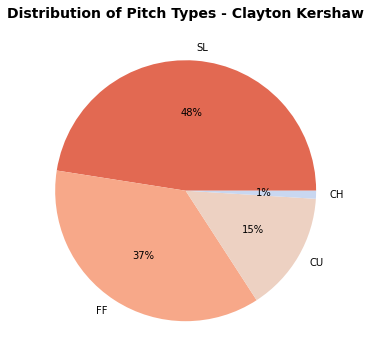

In [5]:
plt.figure(figsize = (8, 6))

dist = round(kershaw.pitch_type.value_counts(normalize = True), 2)
color = sns.color_palette('coolwarm_r')

plt.pie(dist, labels = order, colors = color, autopct = '%.0f%%')
plt.title('Distribution of Pitch Types - Clayton Kershaw', fontdict = font_title, pad = 15);

### Pitch Usage by Batter Handedness

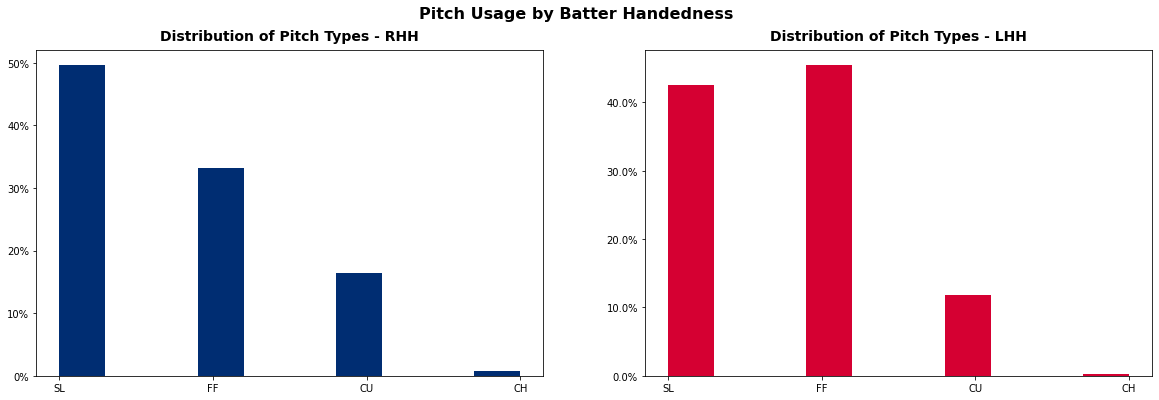

In [6]:
blue = '#002D72'
red = '#D50032'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Batter Handedness', fontsize = 16, fontweight = 'bold')

dist_r = r_kershaw.pitch_type.sort_values(ascending = False)
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = blue)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHH', fontdict = font_title, pad = 15)

dist_l = l_kershaw.pitch_type.sort_values(ascending = False)
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = red)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHH', fontdict = font_title, pad = 15);

### Velocity by Pitch Type

Slider velo sits: 86 - 88 mph,  max: 90.5 mph
4-Seam velo sits: 90 - 91 mph,  max: 92.9 mph
Curve velo sits: 74 - 75 mph,  max: 77.1 mph
Changeup velo sits: 86 - 88 mph,  max: 89.3 mph


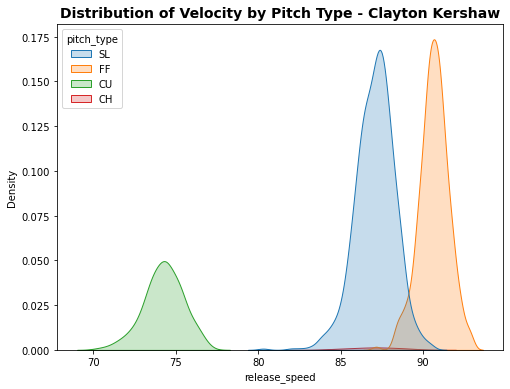

In [7]:
plt.figure(figsize = (8, 6))

ax = sns.kdeplot(data = kershaw, x = 'release_speed', shade = 'fill', hue = 'pitch_type',
            hue_order = order, palette = 'tab10')
sns.move_legend(ax, 'upper left')
plt.title('Distribution of Velocity by Pitch Type - Clayton Kershaw', fontdict = font_title, pad = 12);
print('Slider velo sits:',round(sl['release_speed'].quantile(.25)),'-',round(sl['release_speed'].quantile(.75)), 
      'mph, ','max:',round(sl['release_speed'].max(),2),'mph')
print('4-Seam velo sits:',round(ff['release_speed'].quantile(.25)),'-',round(ff['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(ff['release_speed'].max(), 2), 'mph')
print('Curve velo sits:',round(cu['release_speed'].quantile(.25)),'-',round(cu['release_speed'].quantile(.75)), 
      'mph, ','max:',round(cu['release_speed'].max(), 2),'mph')
print('Changeup velo sits:',round(ch['release_speed'].quantile(.25)),'-',round(ch['release_speed'].quantile(.75)),
      'mph, ','max:',round(ch['release_speed'].max(), 2),'mph')

### Pitch Velocity by Pitch Number

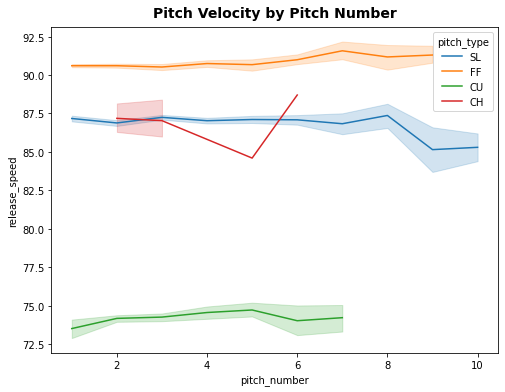

In [8]:
plt.figure(figsize = (8, 6))

sns.lineplot(data = kershaw, x = 'pitch_number', y = 'release_speed', hue = 'pitch_type',
             hue_order = order, palette = 'tab10')
plt.title('Pitch Velocity by Pitch Number', fontdict = font_title, pad = 15);

# Pitcher Stuff

### Spin Axis

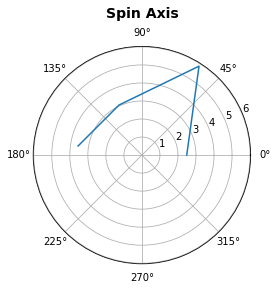

In [9]:
spin_axis = kershaw.groupby(['pitch_type']).mean()
ax = plt.subplot(polar = True)
ax.plot([radians(x) for x in spin_axis['spin_axis'].values])
ax.set_title('Spin Axis', fontdict = font_title, pad = 15);

### Spin Rate by Pitch Type

Slider spin rate: 2596 - 2722 rpm, max: 3012.0 rpm
4-Seam spin rate: 2439 - 2563 rpm, max: 3316.0 rpm
Curve spin rate: 2449 - 2645 rpm, max: 3124.0 rpm
Changeup spin rate: 2104 - 2204 rpm, max: 2304.0 rpm


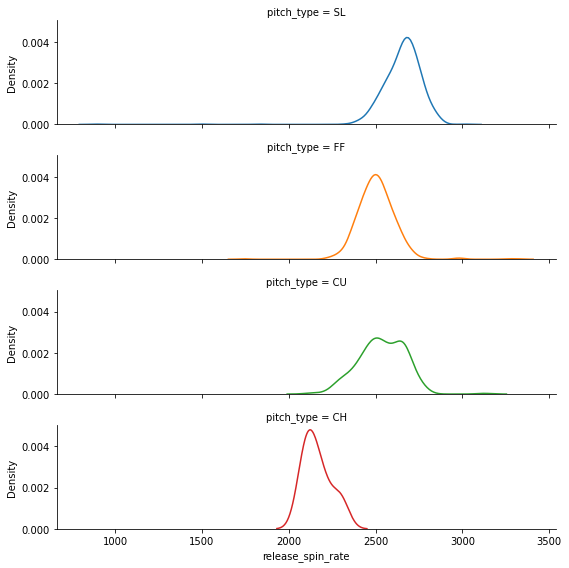

In [10]:
g = sns.FacetGrid(kershaw, row = 'pitch_type', hue = 'pitch_type', height = 2, aspect = 4, );
g.map(sns.kdeplot, 'release_spin_rate', palette = 'tab10')
print('Slider spin rate:',round(sl['release_spin_rate'].quantile(.25)),
      '-',round(sl['release_spin_rate'].quantile(.75)),'rpm,','max:',round(sl['release_spin_rate'].max(),2),'rpm')
print('4-Seam spin rate:',round(ff['release_spin_rate'].quantile(.25)),'-',
      round(ff['release_spin_rate'].quantile(.75)),'rpm,','max:', round(ff['release_spin_rate'].max(), 2), 'rpm')
print('Curve spin rate:',round(cu['release_spin_rate'].quantile(.25)),'-',
      round(cu['release_spin_rate'].quantile(.75)), 'rpm,','max:',round(cu['release_spin_rate'].max(), 2),'rpm')
print('Changeup spin rate:',round(ch['release_spin_rate'].quantile(.25)),'-',
      round(ch['release_spin_rate'].quantile(.75)),'rpm,','max:',round(ch['release_spin_rate'].max(), 2),'rpm');

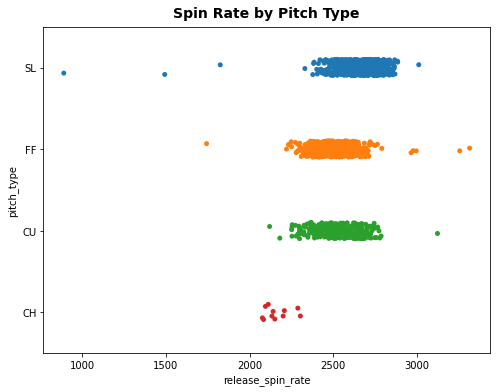

In [11]:
plt.figure(figsize = (8, 6))
sns.stripplot(data = kershaw, x = 'release_spin_rate', y = 'pitch_type')
plt.title('Spin Rate by Pitch Type', fontdict = font_title, pad = 15);

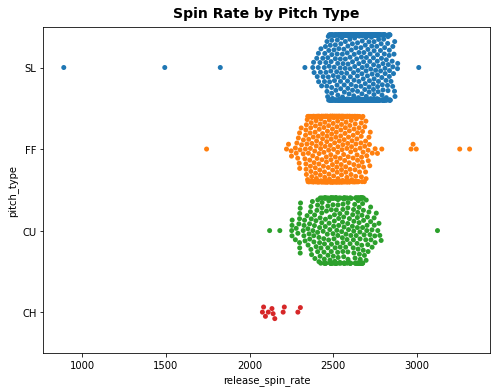

In [12]:
plt.figure(figsize = (8, 6))
sns.swarmplot(data = kershaw, x = 'release_spin_rate', y = 'pitch_type')
plt.title('Spin Rate by Pitch Type', fontdict = font_title, pad = 15);

### Horizontal & Vertical Break Axis

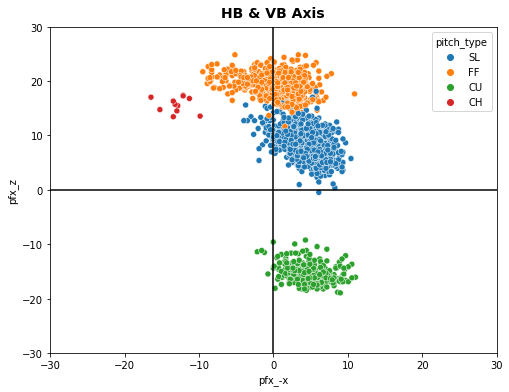

In [13]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kershaw, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black'), plt.axvline(0, color = 'black')
plt.title('HB & VB Axis', fontdict = font_title, pad = 15);

### Velocity & Spin Rate

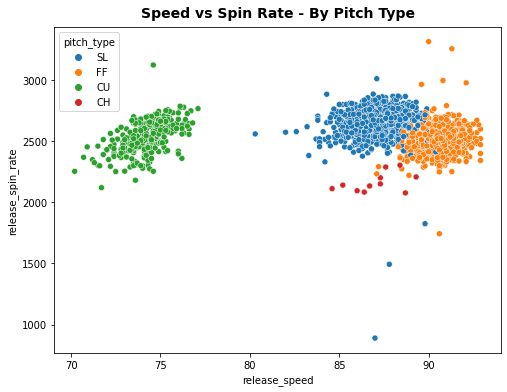

In [14]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kershaw, x = 'release_speed', y = 'release_spin_rate', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.title('Speed vs Spin Rate - By Pitch Type', fontdict = font_title, pad = 15);

### Release Postion

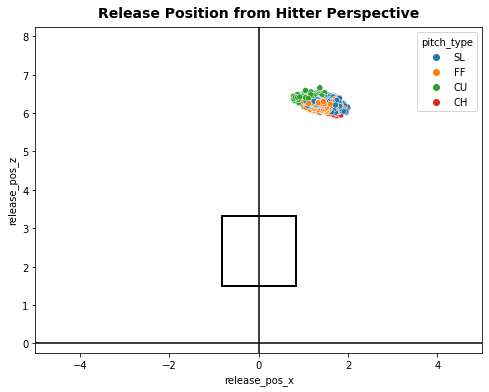

In [15]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kershaw, x = 'release_pos_x', y = 'release_pos_z', hue = 'pitch_type', 
                 hue_order = order, palette = 'tab10')
plt.xlim(-5, 5), plt.ylim(-0.25, 8.25)
plt.axvline(0, color = 'black'), plt.axhline(0, color = 'black')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Release Position from Hitter Perspective', fontdict = font_title, pad = 15);

### Bauer Units

Slider Avg Bauer Units: 30.48
4-Seam Avg Bauer Units: 27.64
Curveball Avg Bauer Units: 34.15
Changeup Avg Bauer Units: 24.85


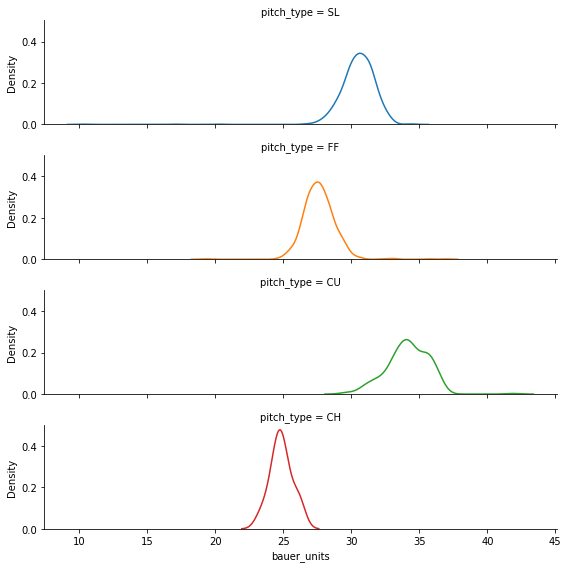

In [16]:
g = sns.FacetGrid(kershaw, row = 'pitch_type', hue = 'pitch_type', height = 2, aspect = 4, )
g.map(sns.kdeplot, 'bauer_units', palette = 'tab10')
print('Slider Avg Bauer Units:', round(sl['bauer_units'].mean(), 2))
print('4-Seam Avg Bauer Units:', round(ff['bauer_units'].mean(), 2))
print('Curveball Avg Bauer Units:', round(cu['bauer_units'].mean(), 2))
print('Changeup Avg Bauer Units:', round(ch['bauer_units'].mean(), 2));

# Count Breakdown

### Pitch Usage by Count

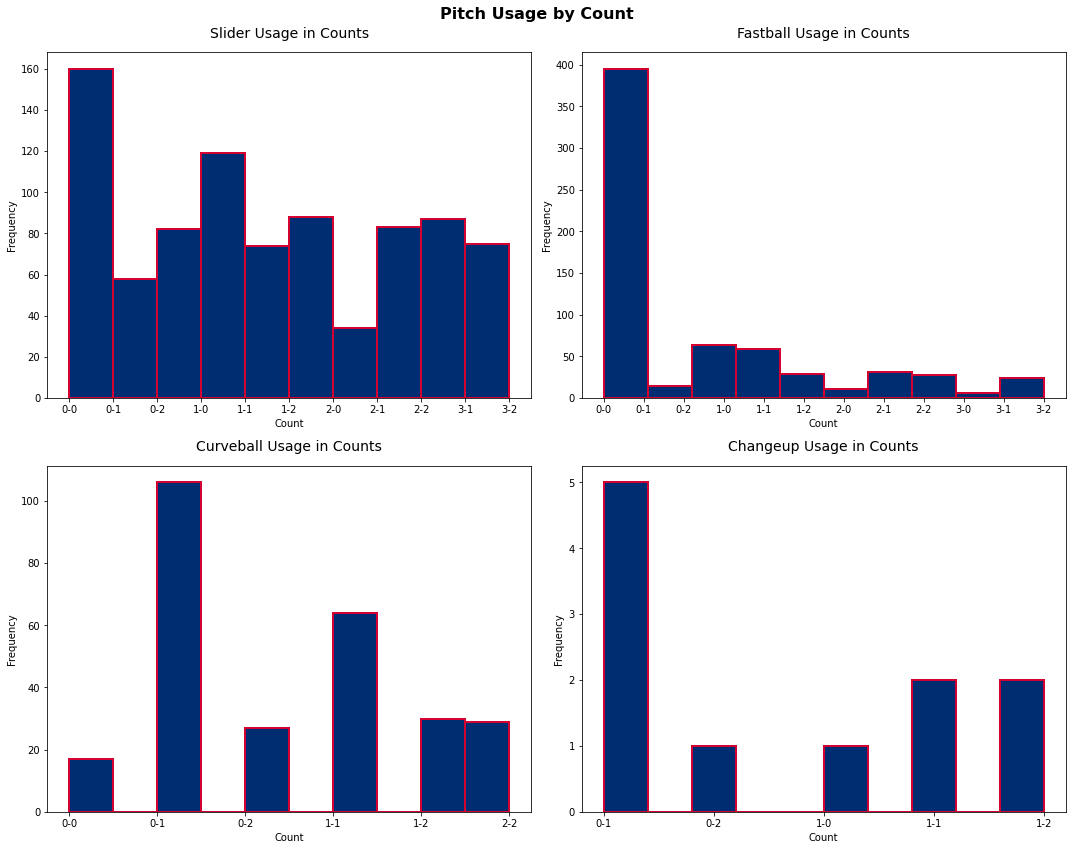

In [17]:
fig, axs = plt.subplots(2, 2, figsize = (15, 12))
fig.suptitle('Pitch Usage by Count', fontsize = 16, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')
axs[0][0].hist(sl['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][0].set_title('Slider Usage in Counts', fontsize = 14, pad = 15)

axs[0][1].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][1].set_title('Fastball Usage in Counts', fontsize = 14, pad = 15)

axs[1][0].hist(cu['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][0].set_title('Curveball Usage in Counts', fontsize = 14, pad = 15)

axs[1][1].hist(ch['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][1].set_title('Changeup Usage in Counts', fontsize = 14, pad = 15)

plt.tight_layout();

# Pitch-Locations

### Balls & Strikes from Hitters' Perspective - All Pitches)

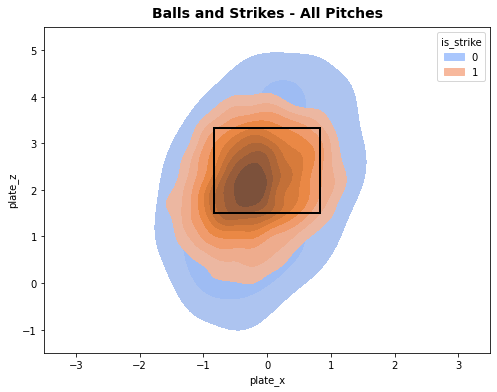

In [18]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = kershaw, x = 'plate_x', y = 'plate_z', fill = True, palette = 'coolwarm', hue = 'is_strike')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.xlim(-3.5, 3.5)
plt.ylim(-1.5, 5.5)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

### Pitch Location by Pitch Type

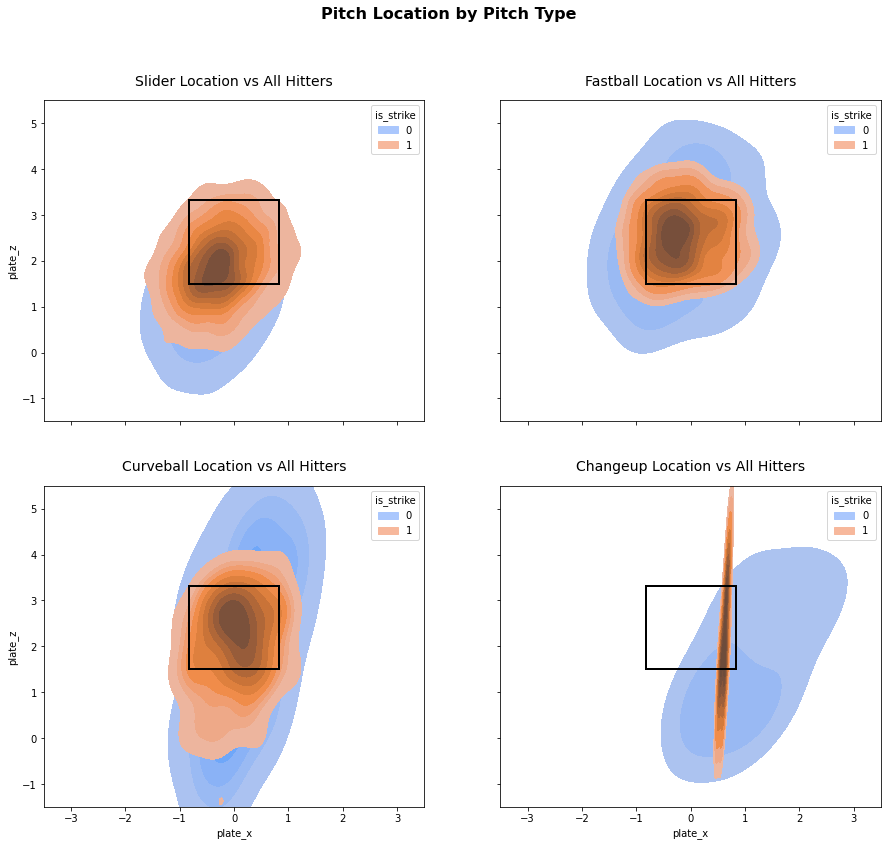

In [19]:
fig, axs = plt.subplots(2, 2, figsize = (15, 13), sharex = True, sharey = True)
fig.suptitle('Pitch Location by Pitch Type', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=sl,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Slider Location vs All Hitters', fontsize = 14, pad = 15)

sns.kdeplot(ax = axs[0][1],data=ff,x='plate_x',y='plate_z',fill = True,hue='is_strike',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Fastball Location vs All Hitters', fontsize = 14, pad = 15)

sns.kdeplot(ax = axs[1][0],data=cu,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Curveball Location vs All Hitters', fontsize = 14, pad = 15)

sns.kdeplot(ax = axs[1][1],data=ch,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Changeup Location vs All Hitters', fontsize = 14, pad = 15);

# Heatmaps

### Slider Heatmaps

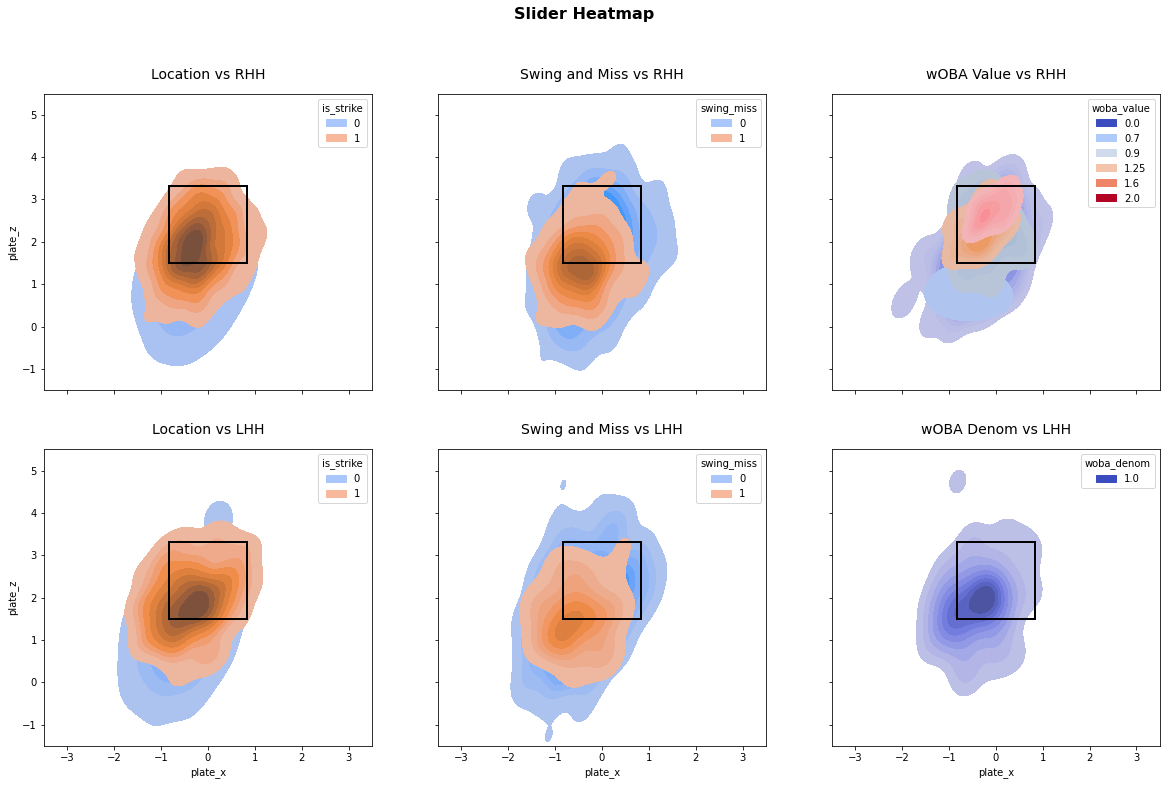

In [20]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_sl,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_sl,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_sl,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_sl,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_sl,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_sl,x='plate_x',y='plate_z',fill=True,hue='woba_denom',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Denom vs LHH', fontsize = 14, pad = 15);

### Fastball Heatmaps

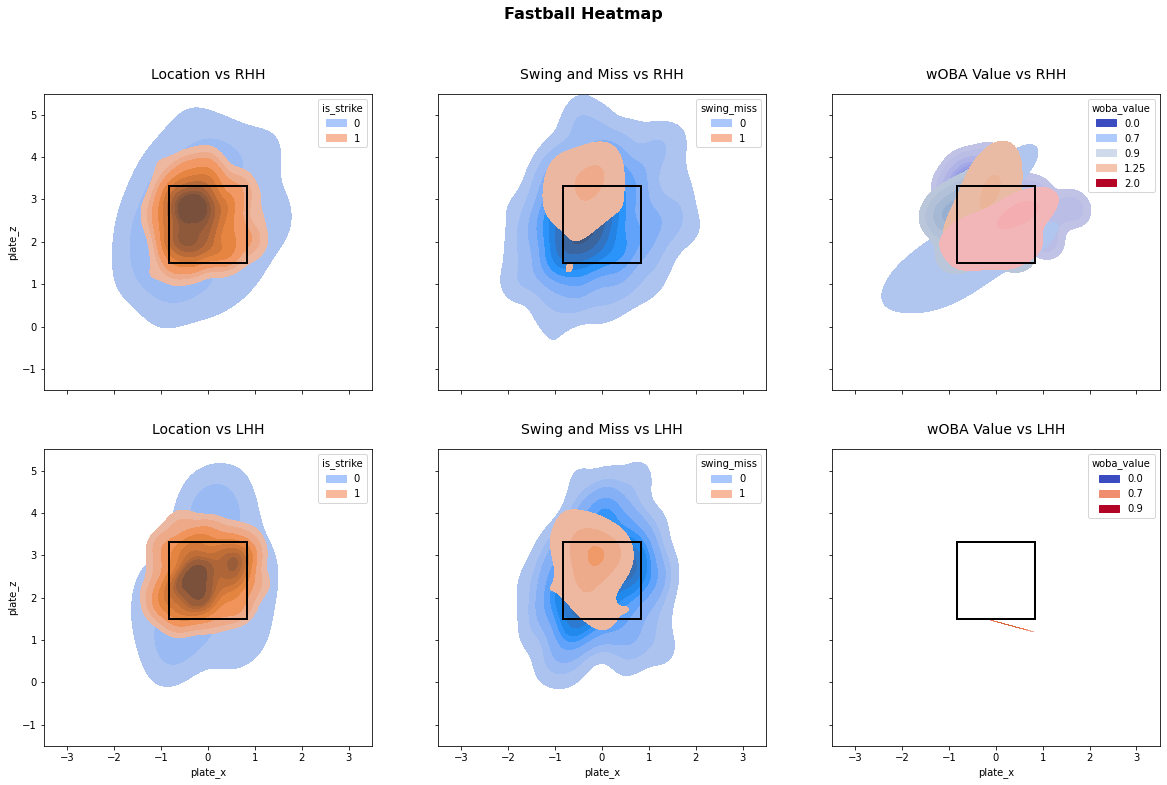

In [21]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_ff,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_ff,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHH', fontsize = 14, pad = 15);

### Curveball Heatmaps

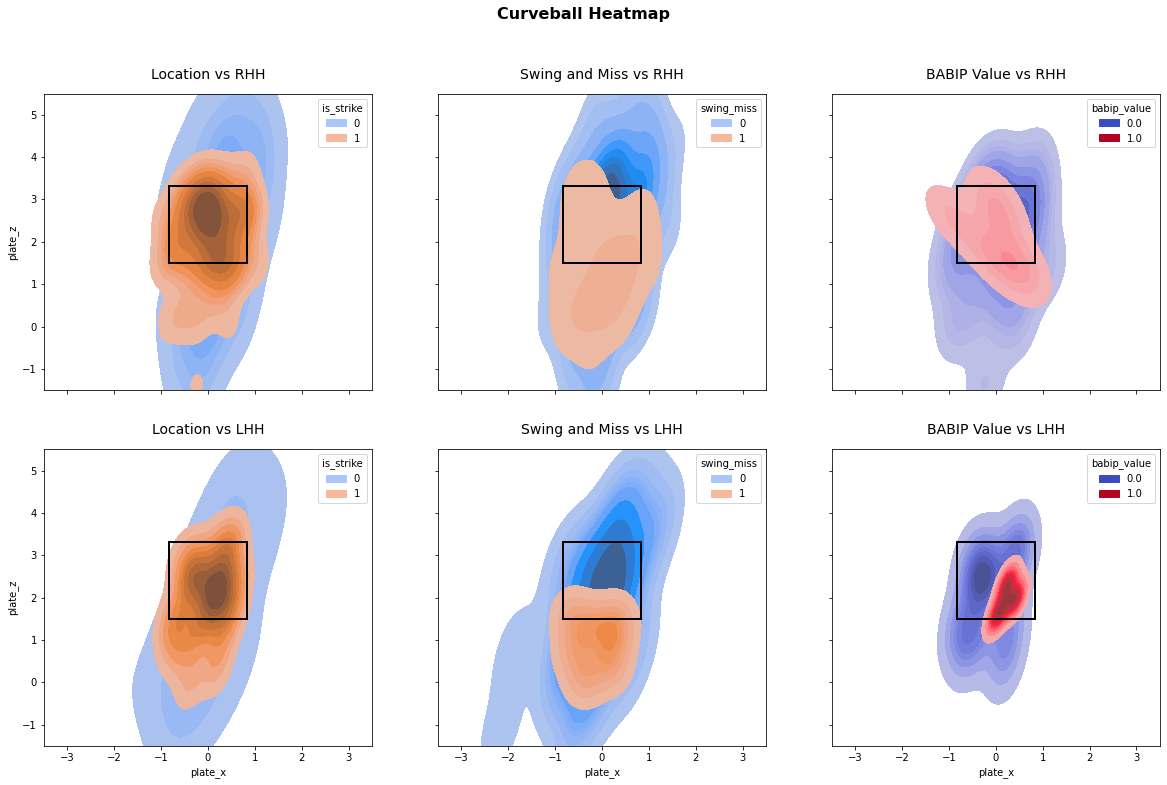

In [22]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Curveball Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_cu,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_cu,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_cu,x='plate_x',y='plate_z',fill=True,hue='babip_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('BABIP Value vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_cu,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_cu,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_cu,x='plate_x',y='plate_z',fill=True,hue='babip_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('BABIP Value vs LHH', fontsize = 14, pad = 15);

### Changeup Heatmaps

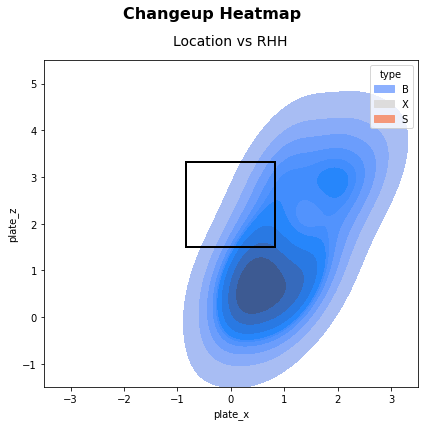

In [23]:
plt.figure(figsize = (6, 6))

sns.kdeplot(data = r_ch, x = 'plate_x', y = 'plate_z', fill = True, hue = 'type', palette='coolwarm')
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.xlim(-3.5, 3.5)
plt.ylim(-1.5, 5.5)
plt.suptitle('Changeup Heatmap', fontsize = 16, fontweight = 'bold')
plt.title('Location vs RHH', fontsize = 14, pad = 15)
plt.tight_layout();